# Example of DOV search methods for groundwater permits (grondwatervergunningen)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_boringen.ipynb)

Mind that the data source of groundwater permits is just a WFS. It can be accessed with simple WFS calls from OWSLib. It is included in the pydov API for ease of access for less experienced users. And to provide a general interface with unit testing to all considered objects.

## Use cases explained below
* Get permits in a bounding box
* Get permits in a bounding box based on specific properties
* Select permits in a municipality and return depth
* Get permits, returning fields not available in the standard output dataframe
* Get for a certain permit the measured water quality parameters if available

In [1]:
%matplotlib inline
import inspect, sys
import warnings; warnings.simplefilter('ignore')

In [2]:
# check pydov path
import pydov

## Get information about the datatype 'GrondwaterVergunning'

In [3]:
from pydov.search.grondwatervergunning import GrondwaterVergunningSearch
gwv = GrondwaterVergunningSearch()

A description is provided for the 'Gwvergunningen' datatype (in Dutch):

In [4]:
gwv.get_description()

'Vergunningen verleend voor het winnen van grondwater kunnen gevisualiseerd en bevraagd worden in de Databank Ondergrond Vlaanderen. \r\nSinds 1999 zijn vergunningen verleend volgens de VLAREM-wetgeving. Ze zijn ingedeeld in klasse 1, 2 of 3, waarbij er voor klasse 1 en 2 een vergunningsplicht geldt en voor klasse 3 een meldingsplicht. De indelingslijst is terug te vinden in VLAREM I (het winnen van grondwater is opgenomen onder rubriek 53). Oudere aanvragen zijn verleend volgens het Grondwaterdecreet. Deze zijn ingedeeld in categorie A, B en C.'

The different fields that are available for objects of the 'Gwvergunningen' datatype can be requested with the get_fields() method:

In [5]:
fields = gwv.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

id_vergunning
pkey_installatie
exploitant_naam
inrichtingsnummer
watnr
vlaremrubriek
vergund_jaardebiet
vergund_dagdebiet
van_datum_termijn
tot_datum_termijn
aquifer_vergunning
diepte
vergund_aantal_putten
inrichtingsklasse
vergunningverlenende_overheid_VVO
referentie_VVO
nacebelcode
IIOA_CBBnr
IIOA_adres
grondwaterlichaam
actie_waakgebied
x
y
exploitant_adres
cbbnr
kbonr
heffingsnummer
exploitant_namen


You can get more information of a field by requesting it from the fields dictionary:
* *name*: name of the field
* *definition*: definition of this field
* *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe. However, since the data source is currently a WFS, the cost of each field is 1
* *notnull*: whether the field is mandatory or not
* *type*: datatype of the values of this field

In [6]:
fields['actie_waakgebied']

{'name': 'actie_waakgebied',
 'definition': 'de actie- en waakgebieden afgebakend i.k.v. het gebiedspecifieke beleid zoals vastgesteld in de herstelprogrammas voor grondwaterlichamen in ontoereikende kwantitatieve toestand binnen het Centraal Vlaams Systeem, het Brulandkrijtsysteem en het Sokkelsysteem (2016-2021)',
 'type': 'string',
 'notnull': False,
 'query': True,
 'cost': 1}

## Example use cases

### Get permits in a bounding box

Get data for all the permits that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [7]:
from pydov.util.location import Within, Box

df = gwv.search(location=Within(Box(153145, 206930, 163150, 216935)))
df.head()

,id_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
0,14870,https://www.dov.vlaanderen.be/data/installatie...,155190.0,215230.0,10.0,DE VOLKSLUST,ANT-Z1000845,99,5475.0,15.0,1973-06-26,2005-08-20,0200: Kempens Aquifersysteem,Categorie A,"4724: Detailhandel in brood, banketbakkerswerk...",geen actie/waakgebieden,NaN,NaN
1,13683,https://www.dov.vlaanderen.be/data/installatie...,156415.0,215580.0,39.0,WASSERIJ BLANCO,ANT-Z1000974,99,21900.0,60.0,1974-05-08,2005-08-20,0250: Mioceen Aquifersysteem,Categorie A,9601: Wassen en (chemisch) reinigen van textie...,geen actie/waakgebieden,NaN,NaN
2,18100,https://www.dov.vlaanderen.be/data/installatie...,153278.0,215629.0,115.0,ANTWERP BULK CLEANING NV,ANT-gw2/4027,53.8.2<17,7000.0,NaN,2001-10-17,2008-01-17,0400: Oligoceen Aquifersysteem,Klasse 2,812: Reiniging,0400_actiegebied_verzilt,00668834000074,NaN
3,38263,https://www.dov.vlaanderen.be/data/installatie...,153266.0,215596.0,30.0,ANTWERP BULK CLEANING NV,gw1-1690vl,53.8.2<17,15000.0,60.0,2008-01-17,2008-02-13,0254: Zanden van Berchem en/of Voort,Klasse 1,812: Reiniging,geen actie/waakgebieden,00668834000074,NaN
4,38264,https://www.dov.vlaanderen.be/data/installatie...,153266.0,215596.0,30.0,NV KATOEN NATIE-TRUCK & TRAILER SERVICE - ANTW...,gw1-1690vl,53.8.2<17,15000.0,60.0,2008-02-14,2021-12-05,0254: Zanden van Berchem en/of Voort,Klasse 1,812: Reiniging,geen actie/waakgebieden,NaN,NaN


In [8]:
len(df)

359

359 permits were obtained in this bbox. However, not all permits are stil active, indicated by *tot_datum_termijn*. For more information about the extracted volumes, referenced by *vlaremrubriek*, see Vlarem II. See [this link](https://navigator.emis.vito.be/mijn-navigator?woId=70336) for more information about the potential definitions.

In [9]:
fields['vlaremrubriek']

{'name': 'vlaremrubriek',
 'definition': 'Code die gebruikt wordt in VLAREM (bijlage 1 VLAREM II) om een rubriek aan te duiden',
 'type': 'string',
 'notnull': False,
 'query': True,
 'cost': 1}

### Get permits in a bounding box with specific properties

Next to querying permits based on their geographic location within a bounding box, we can also search for permits matching a specific set of properties. For this we can build a query using a combination of the 'Gwvergunningen' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [10]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsGreaterThan* operator in addition to the earlier bbox, to restrict the query to active permits:

In [11]:
from owslib.fes import PropertyIsGreaterThan

query = PropertyIsGreaterThan(propertyname='tot_datum_termijn',
                          literal='2020-09-01')
df = gwv.search(query=query,
                location=Within(Box(153145, 206930, 163150, 216935)))

df.head()

,id_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
0,38264,https://www.dov.vlaanderen.be/data/installatie...,153266.00,215596.00,30.0,NV KATOEN NATIE-TRUCK & TRAILER SERVICE - ANTW...,gw1-1690vl,53.8.2<17,15000.0,60.0,2008-02-14,2021-12-05,0254: Zanden van Berchem en/of Voort,Klasse 1,812: Reiniging,geen actie/waakgebieden,NaN,NaN
1,58038,https://www.dov.vlaanderen.be/data/installatie...,153483.00,216459.00,26.0,QUALITY CARWASH NV,ANT/gw1-3843,53.8.2<17,21800.0,100.0,2015-07-24,2021-10-31,0254: Zanden van Berchem en/of Voort,Klasse 2,45206: Wassen en poetsen van motorvoertuigen,geen actie/waakgebieden,00672926000042,NaN
2,67288,https://www.dov.vlaanderen.be/data/installatie...,154633.10,212242.23,7.0,Vlaams Bodemsaneringsfonds voor de Textielverz...,ANT-01066-A,53.2.2.b)2.,64800.0,240.0,2020-05-28,2021-02-28,0250: Mioceen Aquifersysteem,Klasse 2,39000: Sanering en ander afvalbeheer,geen actie/waakgebieden,NaN,0886185961
3,64913,https://www.dov.vlaanderen.be/data/installatie...,153985.69,212087.01,25.0,BEDRIJFSBOUW EN PROJECTBOUW VERELST,ANT-00844-A,53.2.2.b)2.,375000.0,NaN,2019-09-27,2020-09-14,0250: Mioceen Aquifersysteem,Klasse 2,41201: Algemene bouw van residentiële gebouwen...,NaN,NaN,0419455714
4,61804,https://www.dov.vlaanderen.be/data/installatie...,153194.00,213991.00,6.0,HERBOSCH-KIERE,VLA-00087-A,53.2.2.b)1.,360000.0,NaN,2018-11-22,2020-11-22,0000: Onbekend,Klasse 3,0000: onbekend,NaN,NaN,NaN


In [12]:
len(df)

61

Contrary to the earlier query, this result contains considerably less active permits in the considered bbox.

Mind that among these permits, there could also be permits for dewatering works, or ATES systems. Both of these are mostly not important in the development of a hydrogeological model. For dewatering works, it is currently not possible to see the operational status. These works could have well been finished some time ago, or not. See [this link](https://navigator.emis.vito.be/mijn-navigator?woId=70336) for more information about *vlaremrubriek* codes.

### Select permits in a municipality and return depth

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the permits in the city of Ghent and return their depth. For this a remote WFS GML query is used as described in [this notebook](https://github.com/DOV-Vlaanderen/pydov/blob/master/docs/notebooks/remote_wfs_gml_query.ipynb):

array([[<AxesSubplot:title={'center':'diepte'}>]], dtype=object)

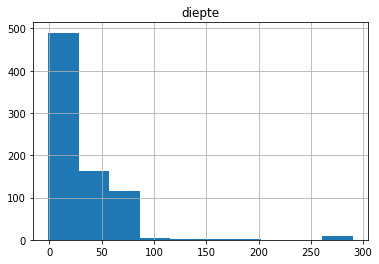

In [13]:
from owslib.etree import etree
from owslib.wfs import WebFeatureService
from owslib.fes import PropertyIsEqualTo

from pydov.util.location import GmlFilter

gemeentegrenzen = WebFeatureService(
    'https://geoservices.informatievlaanderen.be/overdrachtdiensten/VRBG/wfs',
    version='1.1.0')
naam_filter = PropertyIsEqualTo(propertyname='NAAM', literal='Gent')
gemeente_poly = gemeentegrenzen.getfeature(
    typename='VRBG:Refgem',
    filter=etree.tostring(naam_filter.toXML()).decode("utf8")).read()

df = gwv.search(
    location=GmlFilter(gemeente_poly, Within), 
    return_fields=('id_vergunning', 'diepte'))
df.hist(column='diepte')

In [14]:
df.describe()

,diepte
count,785.000000
mean,30.765694
std,36.785930
min,-1.000000
25%,8.000000
50%,18.000000
75%,46.000000
max,290.000000


### Get permit data, returning fields not available in the standard output dataframe

Not all fields are available in the default output frame. However, you can examine the available fields with the *get_fields()* method and pass the desired field name to the *return_fields* parameter.

In [15]:
from owslib.fes import PropertyIsGreaterThanOrEqualTo

query = PropertyIsGreaterThanOrEqualTo(
            propertyname='diepte',
            literal='200')

df = gwv.search(
    location=GmlFilter(gemeente_poly, Within),
    return_fields=('id_vergunning', 'diepte', 'vergunningverlenende_overheid_VVO'))

df.head()

,id_vergunning,diepte,vergunningverlenende_overheid_VVO
0,64727,4.0,Gemeentebestuur GENT
1,67206,NaN,Gemeentebestuur GENT
2,68907,9.9,Gemeentebestuur GENT
3,63938,7.0,Gemeentebestuur GENT
4,66990,4.0,Gemeentebestuur GENT


### Estimate groundwater quality data for a certain permit

Given groundwater scarcity in Belgium, the reuse of dewatering drainage is increasingly being considerd. In some cases, this water contains a high iron load which is not desirable for a lot of applications.  
Determine the groundwater quality for a certain permit, e.g. for the permit at Diestsestraat 209 3000 Leuven.

In [16]:
from pydov.util.location import Within, Box
import pandas as pd

query = PropertyIsEqualTo(propertyname='inrichtingsnummer',
                          literal='20181004-0018')
df_permit = gwv.search(query=query)
df_permit.head()

,id_vergunning,pkey_installatie,x,y,diepte,exploitant_naam,watnr,vlaremrubriek,vergund_jaardebiet,vergund_dagdebiet,van_datum_termijn,tot_datum_termijn,aquifer_vergunning,inrichtingsklasse,nacebelcode,actie_waakgebied,cbbnr,kbonr
0,64279,https://www.dov.vlaanderen.be/data/installatie...,174097.89,174672.54,11.0,Rialto Holding,VLB-00133-A,53.2.2.a),22450.0,445.0,2019-05-29,NaN,0620: Zand van Brussel,Klasse 3,64200: Holdings,NaN,NaN,0675544028


The water is extracted from the hydrogeological layer 'Zand van Brussel' which is designated with the according HCOV code '0620'. We can now look in the data from the groundwater quality monitoring wells which wells are situated nearby for that specific hydrogeological layer. For this, we first have to look at the dataset comprising the head measurements, that also contains the HCOV code of the aquifer. Subsequently, we can fetch the water quality monitoring data of the selected well screens.  
More information on the HCOV code can be found through this [link](https://www.dov.vlaanderen.be/index.php/page/hcov-kartering). 

In [17]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
from pydov.search.grondwatermonster import GrondwaterMonsterSearch
from pydov.util.query import Join

gfs = GrondwaterFilterSearch()
fields = gfs.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])


gw_id
pkey_grondwaterlocatie
filternummer
pkey_filter
namen
filtergrafiek
putgrafiek
aquifer
diepte_onderkant_filter
lengte_filter
putsoort
filtertype
meetnet
x
y
start_grondwaterlocatie_mtaw
gemeente
grondwaterlichaam
regime
datum_in_filter
datum_uit_filter
stijghoogterapport
analyserapport
boornummer
boringfiche
peilmetingen_van
peilmetingen_tot
kwaliteitsmetingen_van
kwaliteitsmetingen_tot
recentste_exploitant
beheerder
mv_mtaw
meetnet_code
aquifer_code
grondwaterlichaam_code
datum
tijdstip
peil_mtaw
betrouwbaarheid
methode
filterstatus
filtertoestand


In [18]:
from pydov.search.grondwaterfilter import GrondwaterFilterSearch
from pydov.search.grondwatermonster import GrondwaterMonsterSearch
from pydov.util.query import Join

gfs = GrondwaterFilterSearch()
gwmonster = GrondwaterMonsterSearch()

df_gfs = gfs.search(location=Within(Box(170000, 174000, 190000, 180000)),
                   return_fields=['pkey_filter', 'x', 'y', 'aquifer', 'diepte_onderkant_filter'])

filters = df_gfs[(df_gfs['aquifer'].str.contains('0620')) ]
filters.head()

,pkey_filter,x,y,aquifer,diepte_onderkant_filter
27,https://www.dov.vlaanderen.be/data/filter/1963...,178045.0,179645.0,0620 - Zand van Brussel,NaN
38,https://www.dov.vlaanderen.be/data/filter/1970...,173350.0,178850.0,0620 - Zand van Brussel,35.0
39,https://www.dov.vlaanderen.be/data/filter/1970...,173344.0,178861.0,0620 - Zand van Brussel,35.0
40,https://www.dov.vlaanderen.be/data/filter/1998...,172784.0,178377.0,0620 - Zand van Brussel,66.0
46,https://www.dov.vlaanderen.be/data/filter/1985...,173367.0,178215.0,0620 - Zand van Brussel,30.0


Now select the according water quality data

In [19]:
df_gwq = gwmonster.search(query=Join(filters, 'pkey_filter'),
                         )
df_gwq['parameter'] = df_gwq['parameter'].str.encode('utf-8')
df_gwq['parameter'].unique()

[000/192] cccccccccccccccccccccccccccccccccccccccccccccccccc
[050/192] cccccccccccccccccccccccccccccccccccccccccccccccccc
[100/192] cccccccccccccccccccccccccccccccccccccccccccccccccc
[150/192] cccccccccccccccccccccccccccccccccccccccccc


array([b'Na', b'EC', b'Mg', b'Cd', b'Ca', b'NO2', b'Zn', b'Al', b'CN',
       b'Cr', b'K', b'HCO3', b'F', b'Cl', b'As', b'Cu', b'T', b'Ni',
       b'Pb', b'NH4', b'TOC', b'Mn', b'NO3', b'CO3', b'Fe', b'O2',
       b'Eh\xc2\xb0', b'PO4', b'Fe2+', b'SO4', b'Hg', b'pH', b'EC(Lab.)',
       b'Co', b'pH(Lab.)', b'Isoprot', b'chazr', b'Bentaz', b'metola-S',
       b'atr_des', b'Terbu', b'Diur', b'Simaz', b'VIS', b'DMS',
       b'Chlortol', b'BAM', b'Atraz', b'AMPA', b'Chloridaz', b'Glyfos',
       b'Linur', b'SomAN', b'SomKAT', b'B', b'%AfwijkBalans',
       b'trichlorpyr', b'Mesotri', b'fluopicolide', b'meta9', b'Dchdzn',
       b'meta4', b'meta11', b'Imida', b'Triflox', b'Metola-S-ESA',
       b'flufe', b'meta8', b'Br', b'TDS', b'Temp.', b'PropaCl', b'24d',
       b'Linur_mono', b'Propan', b'Terbu_des', b'Carben',
       b'Atr_desisoprop', b'Propaz', b'brom', b'Ethofum', b'mcpa',
       b'Carbet', b'Cyana', b'Metaza', b'Prometr', b'Clproph',
       b'5ClFenol', b'Metox', b'Ala', b'Metobro'

In [20]:
pars_select = [b'Fe', b'Fe2+', b'Fe(Tot.)', b'Fe3+']
df_selected = df_gwq.loc[df_gwq.parameter.isin(pars_select), :]
df_stat = df_selected.loc[:, ['parameter', 'waarde']].groupby('parameter').describe().unstack(1)
df_stat

               parameter
waarde  count  b'Fe'        182.000000
               b'Fe2+'       75.000000
        mean   b'Fe'          1.524795
               b'Fe2+'        0.701560
        std    b'Fe'          1.972383
               b'Fe2+'        1.268594
        min    b'Fe'          0.000000
               b'Fe2+'        0.000000
        25%    b'Fe'          0.020000
               b'Fe2+'        0.020000
        50%    b'Fe'          0.437550
               b'Fe2+'        0.070000
        75%    b'Fe'          3.389250
               b'Fe2+'        0.649000
        max    b'Fe'         12.300000
               b'Fe2+'        4.400000
dtype: float64

Mind the units of the values. 

In [21]:
df_selected.eenheid.unique()

array(['mg/l'], dtype=object)

As such, the iron content of the considered hydrogeological layer is on average 1.5 mg/L with a stdev of 1.97 mg/L. This is most likely above the standars for use as irrigation water (see this [link](https://lv.vlaanderen.be/nl/voorlichting-info/publicaties/praktijkgidsen/water/duurzaam-watergebruik-de-openluchtgroenteteelt-3#chemische)).